In [0]:
# 載入套件

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# 載入訓練、測試資料

SP_train = pd.read_csv('S&P500 training.csv')
SP_test = pd.read_csv('S&P500 testing.csv')

In [0]:
# 定義目標變數(四個交易日後的收盤價與今日收盤價比較，大於今日收盤價為1，小於為0)

SP_train['fourday_trend'] = np.where(SP_train['Close Price'].shift(-4) > SP_train['Close Price'], 1, 0)

SP_test['fourday_trend'] = np.where(SP_test['Close Price'].shift(-4) > SP_test['Close Price'], 1, 0)

#EDA 資料探索

**進行資料基本內容探索**

**從以下資料探索中可以得知資料並不需要進行預處理，主要有幾個原因:**

**1.資料並為缺失值**

**2.資料並無類別數據需要處理**

**3.資料單位相同不需要進行標準化**

In [80]:
SP_train.tail(20)

,Date,Open Price,Close Price,High Price,Low Price,Volume,fourday_trend
2244,01-Dec-2017,2645.10,2642.22,2650.62,2605.52,2458475264,0
2245,04-Dec-2017,2657.19,2639.44,2665.19,2639.03,2693446656,1
2246,05-Dec-2017,2639.78,2629.57,2648.72,2627.73,2194970112,1
2247,06-Dec-2017,2626.24,2629.27,2634.41,2624.75,1903629696,1
2248,07-Dec-2017,2628.38,2636.98,2640.99,2626.53,1933267328,1
2249,08-Dec-2017,2646.21,2651.50,2651.65,2644.10,1810793472,1
2250,11-Dec-2017,2652.19,2659.99,2660.33,2651.47,1775251584,1
2251,12-Dec-2017,2661.73,2664.11,2669.72,2659.78,1977181824,1
2252,13-Dec-2017,2667.59,2662.85,2671.88,2662.85,1931148416,1
2253,14-Dec-2017,2665.87,2652.01,2668.09,2652.01,1974812928,1


In [81]:
SP_test.tail(20)

,Date,Open Price,Close Price,High Price,Low Price,Volume,fourday_trend
232,03-Dec-2018,2790.50,2790.37,2800.18,2773.38,2549100288,0
233,04-Dec-2018,2782.43,2700.06,2785.93,2697.18,2813910016,0
234,05-Dec-2018,2782.43,2700.06,2785.93,2697.18,2858957824,0
235,06-Dec-2018,2663.51,2695.95,2696.15,2621.53,3115363584,0
236,07-Dec-2018,2691.26,2633.08,2708.54,2623.14,2457232384,1
237,10-Dec-2018,2630.86,2637.72,2647.51,2583.23,2434630656,0
238,11-Dec-2018,2664.44,2636.78,2674.35,2621.30,2242852864,0
239,12-Dec-2018,2658.23,2651.07,2685.44,2650.26,2304548096,0
240,13-Dec-2018,2658.70,2650.54,2670.19,2637.27,2241559552,0
241,14-Dec-2018,2629.68,2599.95,2635.07,2593.84,2429752576,0


In [82]:
SP_train.info()
print('-' * 50)
SP_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2264 non-null   object 
 1   Open Price     2264 non-null   float64
 2   Close Price    2264 non-null   float64
 3   High Price     2264 non-null   float64
 4   Low Price      2264 non-null   float64
 5   Volume         2264 non-null   int64  
 6   fourday_trend  2264 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 123.9+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           252 non-null    object 
 1   Open Price     252 non-null    float64
 2   Close Price    252 non-null    float64
 3   High Price     252 non-null    float64
 4   Low Price 

In [83]:
SP_train.describe()

,Open Price,Close Price,High Price,Low Price,Volume,fourday_trend
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,1656.142686,1656.767562,1664.427054,1647.425128,2.948755e+09,0.590548
std,485.292193,485.226120,484.808706,485.576116,1.351675e+09,0.491841
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08,0.000000
25%,1238.602500,1239.337500,1246.695000,1227.587500,2.048980e+09,0.000000
50%,1649.135000,1650.405000,1656.145000,1639.600000,2.506637e+09,1.000000
75%,2070.300000,2071.190000,2079.507500,2058.757500,3.373334e+09,1.000000
max,2692.710000,2690.160000,2694.970000,2685.920000,9.120100e+09,1.000000


In [84]:
SP_test.describe()

,Open Price,Close Price,High Price,Low Price,Volume,fourday_trend
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,2747.910397,2746.030873,2762.747778,2730.143929,2.154050e+09,0.555556
std,99.017479,100.251272,92.991345,106.490954,4.538626e+08,0.497893
min,2363.120000,2351.100000,2410.340000,2346.580000,9.516523e+08,0.000000
25%,2689.465000,2690.512500,2705.847500,2663.677500,1.879841e+09,0.000000
50%,2742.170000,2741.920000,2755.575000,2725.290000,2.063820e+09,1.000000
75%,2811.430000,2814.322500,2824.802500,2800.630000,2.341078e+09,1.000000
max,2936.760000,2930.750000,2940.910000,2927.110000,4.560164e+09,1.000000


# 切割資料

**在train與test中都會把最後4筆資料去除，原因為在train資料內最後四筆**

**是沒有對象可以比較的，因此結果都為0，所以才會拿掉。而test則是因為**

**最後四筆沒辦法得知正確結果，故不知道預測出來的結果是否正確，因此**

**在這邊也拿掉。**

In [0]:
# 除去資料後四筆

SP_train = SP_train.iloc[:-4, :]
SP_test = SP_test.iloc[:-4, :]

In [0]:
# 建立訓練和資料集

train_x = SP_train.drop(['fourday_trend', 'Date'], axis = 1)
train_y = SP_train.fourday_trend

test_x = SP_test.drop(['fourday_trend', 'Date'], axis = 1)
test_y = SP_test.fourday_trend

# 建立模型

**以下分別建立Logistic Regression, Neural Network及Decition Tree**

In [87]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(train_x, train_y)
logit.pred = logit.predict(test_x)
logit.score(test_x, test_y)

0.5645161290322581

In [88]:
# Confusion metrix

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, logit.pred)

array([[  0, 108],
       [  0, 140]])

In [89]:
# Neural Network

from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation


nn = models.Sequential()
nn.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 5))

nn.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))

nn.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))

nn.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

nn.fit(train_x, train_y, batch_size = 10, epochs = 100)

accuracy = nn.evaluate(test_x, test_y)

print('test accuracy:', accuracy)

Epoch 1/100
2260/2260 [==============================] - 0s 154us/step - loss: 25061.4192 - accuracy: 0.5226
Epoch 2/100
2260/2260 [==============================] - 0s 112us/step - loss: 2243.4208 - accuracy: 0.5270
Epoch 3/100
2260/2260 [==============================] - 0s 112us/step - loss: 386.1663 - accuracy: 0.5748
Epoch 4/100
2260/2260 [==============================] - 0s 122us/step - loss: 0.6870 - accuracy: 0.5916
Epoch 5/100
2260/2260 [==============================] - 0s 110us/step - loss: 0.6842 - accuracy: 0.5916
Epoch 6/100
2260/2260 [==============================] - 0s 109us/step - loss: 0.6818 - accuracy: 0.5916
Epoch 7/100
2260/2260 [==============================] - 0s 109us/step - loss: 0.6800 - accuracy: 0.5916
Epoch 8/100
2260/2260 [==============================] - 0s 119us/step - loss: 0.6788 - accuracy: 0.5916
Epoch 9/100
2260/2260 [==============================] - 0s 108us/step - loss: 0.6779 - accuracy: 0.5916
Epoch 10/100
2260/2260 [======================

In [90]:
# Decition Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)
tree.pred = tree.predict(test_x)
tree.score(test_x, test_y)


0.5

In [91]:
# 建立混淆矩陣

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, tree.pred)

array([[ 97,  11],
       [113,  27]])

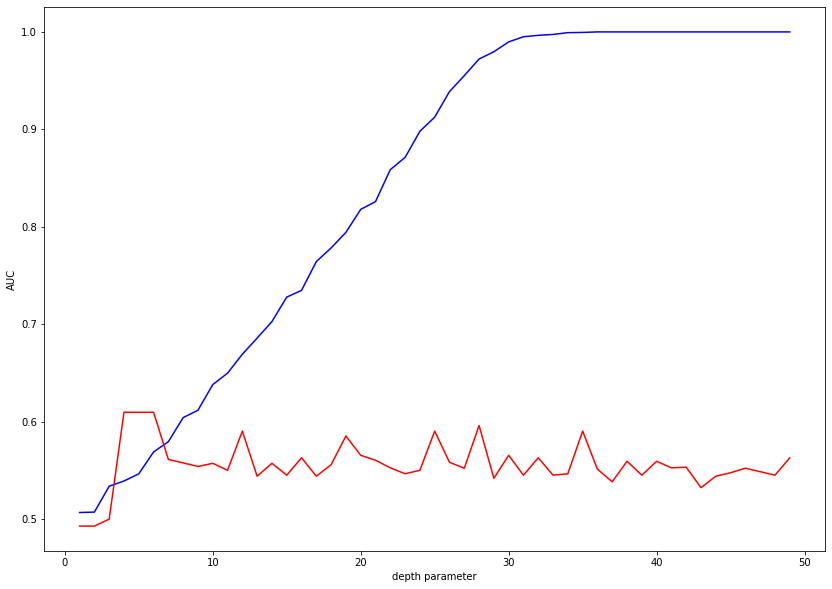

In [92]:
#依據ROC curve來調整depth參數

from sklearn.metrics import roc_curve, auc


depth_parameters = np.arange(1, 50)

train_auc= []
test_auc = []

for test_depth in depth_parameters:
  temp_model = DecisionTreeClassifier(max_depth = test_depth)
  temp_model.fit(train_x, train_y)
  train_predictions = temp_model.predict(train_x)
  test_predictions = temp_model.predict(test_x)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_predictions)
  auc_area = auc(false_positive_rate, true_positive_rate)
  train_auc.append(auc_area)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_predictions)
  auc_area = auc(false_positive_rate, true_positive_rate)
  test_auc.append(auc_area)

plt.figure(figsize = (14,10))
plt.plot(depth_parameters, train_auc, 'b', label = 'Train AUC')
plt.plot(depth_parameters, test_auc, 'r', label = 'Test AUC')
plt.ylabel('AUC')
plt.xlabel('depth parameter')
plt.show()

In [93]:
# Decition Tree(調參)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(train_x, train_y)
tree.pred = tree.predict(test_x)
tree.score(test_x, test_y)



0.592741935483871

In [94]:
# 建立混淆矩陣

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, tree.pred)

array([[80, 28],
       [73, 67]])

# Discuss

**How did you preprocess this data?**

**從資料探索中可以得知資料並不需要進行預處理，主要有幾個原因:**

**1.資料並為缺失值**

**2.資料並無類別數據需要處理**

**3.資料單位相同不需要進行標準化**

**Which classifier reaches the highest classification accuracy in this dataset? Why? Can this result remain if the data is different?**

**這邊使用了Logistic Regression、Neural Network和Decision Tree，accuracy分別為0.5645、0.5645及0.5927，以Decision Tree的分類稍微準確一些。主要是因為原先的Decision Tree只有0.5的accuracy，我稍微調整了參數中的max_depth使他的accuracy提高一些。**

**如果是一樣從S&P500爬下其他時間的資料，我認為預測結果會是差不多的，因為並不需要進行太多的預處理，目標的定義差別也不會太大，得出來的結果應該類似。**

**How did you improve your classifiers?**

**這邊我只針對Decision Tree進行調整參數讓他的預測效果更準確。主要是因為在Logistic Regression中，參數的調整幾乎沒有太大的差異跟意義，這邊就沒有動任何參數。再來是Neural Network，因為是第一次使用，不太曉得該怎麼動參數，所以這裡屬於能力上的不足。最後Decision Tree是根據了ROC curve和AUC來檢視max_depth為多少的時候，他的結果會是最棒的。這邊讓他從1-50去畫出AUC最後的結果，可以看到當在Test data中AUC差不多為4~6的時候，他的AUC會是最高的，所以最後選擇4作為我們max_depth參數的調整。**